In [17]:
# Initial setup
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# Read data into dataframe
lend_ml = pd.read_csv('data/lending_ml.csv')
print(lend_ml.shape)
print(lend_ml.head())

(36182, 8)
  home_ownership         purpose  yr_credit    dti  revol_util_dec  total_acc  \
0           RENT     credit_card       26.0  27.65           0.837        9.0   
1           RENT             car       12.0   1.00           0.094        4.0   
2           RENT  small_business       10.0   8.72           0.985       10.0   
3           RENT           other       15.0  20.00           2.100       37.0   
4           RENT           other       15.0  17.94           0.539       38.0   

  addr_state  target  
0         AZ       1  
1         GA       0  
2         IL       1  
3         CA       1  
4         OR       1  


From the data exploratory exercise, we identified that **loan purpose** appears to influence the loans being paid off rate. To prove that the influence is statistically significant, we run a chi-square test.

**Null Hypothesis (H0)** - different loan purposes do not affect loan paid off rate

**Alternative Hypothesis (H1)** - loan purposes affect paid off rate

**Note**: Target of 0 means loan defaulted, versus 1 means loan was paid off

In [19]:
# Use crosstab function to get the count by purpose
table = pd.crosstab(lend_ml['purpose'], lend_ml['target'], margins=True)

table['paid_off_rate'] = table[1]/(table[1] + table[0])*100 #calculate loan paid off rates

print(table.sort_values(by='paid_off_rate', ascending=False))

target                 0      1    All  paid_off_rate
purpose                                              
car                  140   1263   1403      90.021383
major_purchase       214   1854   2068      89.651838
wedding               87    740    827      89.480048
credit_card          499   4073   4572      89.085739
home_improvement     346   2417   2763      87.477380
All                 5322  30860  36182      85.291029
vacation              54    306    360      85.000000
debt_consolidation  2648  14608  17256      84.654613
house                 56    288    344      83.720930
medical              103    524    627      83.572568
other                609   3018   3627      83.209264
moving                91    442    533      82.926829
renewable_energy      20     80    100      80.000000
educational           32    127    159      79.874214
small_business       423   1120   1543      72.585872


In [20]:
# apply chi square test
stat, p, dof, expected = stats.chi2_contingency(table[[0,1]])
print ('chi_statistic: {:.3f}'.format(stat))
print ('p-value: {:.2f}'.format(p))
print ('degree of freedom: {:.0f}'.format(dof))
print ('expected freq: \n {}'.format(pd.DataFrame(expected, index=table.index)))

chi_statistic: 358.083
p-value: 0.00
degree of freedom: 14
expected freq: 
                               0             1
purpose                                      
car                  206.366868   1196.633132
credit_card          672.494168   3899.505832
debt_consolidation  2538.180090  14717.819910
educational           23.387264    135.612736
home_improvement     406.408877   2356.591123
house                 50.598861    293.401139
major_purchase       304.181527   1763.818473
medical               92.225250    534.774750
moving                78.398817    454.601183
other                533.494389   3093.505611
renewable_energy      14.708971     85.291029
small_business       226.959427   1316.040573
vacation              52.952297    307.047703
wedding              121.643193    705.356807
All                 5322.000000  30860.000000


In [21]:
# interpret p-value, using 95% confident level
prob = 0.95
alpha = 1.0 - prob
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


Conclude that loan_purpose has dependences to loan paid off rates

Additionally, the following attributes will be test per exploratory analysis

- property ownership
- Credit history
- DTI
- Number of credit lines 
- state of the applicants

**H0**: feature selected show dependence to loan paid off rate

**H1**: feature selected does not have dependence to loan paid off rate

In [22]:
# write a function to streamline the testing steps
def chi_square(data):
    table = pd.crosstab(lend_ml[data], lend_ml['target'])
    table['paid_off_rate'] = table[1]/(table[1] + table[0])*100
    stat, p, dof, expected = stats.chi2_contingency(table[[0,1]])
    print ('chi_statistic: {:.3f}'.format(stat))
    print ('p-value: {:.2f}'.format(p))
    print ('degree of freedom: {:.0f}'.format(dof))
    prob = 0.95
    alpha = 1.0 - prob
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

#### Property Ownership

In [23]:
chi_square('home_ownership')

chi_statistic: 40.336
p-value: 0.00
degree of freedom: 3
Dependent (reject H0)


- Home ownership has dependence to the loan paid off rate.

#### Credit History

In [24]:
chi_square('yr_credit')

chi_statistic: 111.507
p-value: 0.00
degree of freedom: 52
Dependent (reject H0)


- Credit History has dependence to the loan paid off rate.

In [25]:
# visualize the result with binned categories
yr_credit_chi = pd.crosstab(lend_ml['yr_credit'], lend_ml['target'])
bins = [0, 5, 10, 15, 20, 30, 40 , 100]
yr_credit_table = lend_ml.copy()
yr_credit_table['binned'] = pd.cut(yr_credit_table['yr_credit'], bins=bins)
table_cre = pd.crosstab(yr_credit_table['binned'], yr_credit_table['target']).sort_index()
table_cre['not_paid_off'] = table_cre[0]/(table_cre[0]+table_cre[1])*100

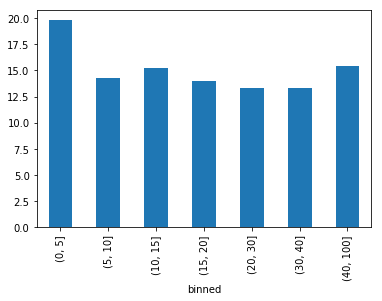

In [26]:
table_cre['not_paid_off'].plot(kind='bar');

#### Debt to income ratio (DTI)

In [27]:
chi_square('dti')

chi_statistic: 2860.664
p-value: 0.52
degree of freedom: 2865
Independent (fail to reject H0)


- DTI at the individual records level does not show dependence to loan paid off rates. 

Access this metric one more time by grouping values into bins.

target       0     1  not_paid_off
binned                            
(0, 5]     541  3794     12.479815
(5, 10]    920  6265     12.804454
(10, 15]  1330  7647     14.815640
(15, 20]  1332  7096     15.804461
(20, 30]  1176  5941     16.523816


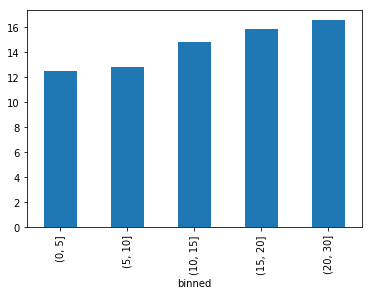

In [28]:
# visual the result with binned categories
bins = [0, 5, 10, 15, 20, 30, 40]
dti_table = lend_ml.copy()
dti_table['binned'] = pd.cut(dti_table['dti'], bins=bins)
table_dti = pd.crosstab(dti_table['binned'], dti_table['target']).sort_index()
table_dti['not_paid_off'] = table_dti[0]/(table_dti[0]+table_dti[1])*100
print(table_dti)
table_dti['not_paid_off'].plot(kind='bar');

The binned category now shows some potential variation on the paid off rates. Run chi square test again

In [29]:
stat, p, dof, expected = stats.chi2_contingency(table_dti[[0,1]])
print ('chi_statistic: {:.3f}'.format(stat))
print ('p-value: {:.2f}'.format(p))
print ('degree of freedom: {:.0f}'.format(dof))
print ('expected freq: \n {}'.format(pd.DataFrame(expected, index=table_dti.index)))
prob = 0.95
alpha = 1.0 - prob
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

chi_statistic: 64.796
p-value: 0.00
degree of freedom: 4
expected freq: 
                     0            1
binned                            
(0, 5]     637.344348  3697.655652
(5, 10]   1056.359664  6128.640336
(10, 15]  1319.824732  7657.175268
(15, 20]  1239.109150  7188.890850
(20, 30]  1046.362105  6070.637895
Dependent (reject H0)


DTI at the category of 5 bins level has dependence to the loan paid off rates. It shows that lower DTI has lower default rates. A new feature column will be added into the dataset during machine learning process.

#### Number of credit lines

In [30]:
chi_square('total_acc')

chi_statistic: 145.637
p-value: 0.00
degree of freedom: 80
Dependent (reject H0)


- Number of credit lines has dependence to the loan paid off rates

target        0     1  not_paid_off
binned                             
(0, 5]      200   843     19.175455
(5, 10]     710  3497     16.876634
(10, 15]    960  5202     15.579357
(15, 20]    925  5499     14.399128
(20, 30]   1410  8991     13.556389
(30, 40]    742  4536     14.058355
(40, 60]    348  2118     14.111922
(60, 100]    27   174     13.432836


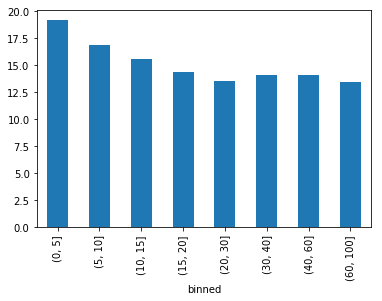

In [31]:
# visual the result with binned categories
bins = [0, 5, 10, 15, 20, 30, 40, 60, 100]
ttl_acc_table = lend_ml.copy()
ttl_acc_table['binned'] = pd.cut(ttl_acc_table['total_acc'], bins=bins)
table_ttl_acc = pd.crosstab(ttl_acc_table['binned'], ttl_acc_table['target']).sort_index()
table_ttl_acc['not_paid_off'] = table_ttl_acc[0]/(table_ttl_acc[0]+table_ttl_acc[1])*100
print(table_ttl_acc)
table_ttl_acc['not_paid_off'].plot(kind='bar');

- Applicants who have less than 10 credit line have the higher chance of paying off the loans.

#### Applicant's State

In [32]:
chi_square('addr_state')
table_state = pd.crosstab(lend_ml['addr_state'], lend_ml['target'], margins=True)
table_state['paid_off_rate'] = table_state[1]/(table_state[1] + table_state[0])*100
print(table_state.sort_values(by='paid_off_rate', ascending=False))

chi_statistic: 116.216
p-value: 0.00
degree of freedom: 45
Dependent (reject H0)
target         0      1    All  paid_off_rate
addr_state                                   
IA             0      1      1     100.000000
MS             0      1      1     100.000000
TN             0      1      1     100.000000
WY             4     74     78      94.871795
DC            10    177    187      94.652406
DE            11    100    111      90.090090
VT             5     43     48      89.583333
WV            19    147    166      88.554217
AR            28    206    234      88.034188
AL            51    369    420      87.857143
CO            88    616    704      87.500000
TX           314   2182   2496      87.419872
KS            29    201    230      87.391304
NH            20    136    156      87.179487
VA           163   1099   1262      87.083994
LA            52    349    401      87.032419
CT            92    609    701      86.875892
RI            23    151    174      86.781609

Applicant's State show dependence to loan paid off rates.

Notice that TN and IA have 100% paid off rate, but they only have 1 records each, hence we don't have big enough sample to conclude that all applicants from both states will always repay their loans.

In the machine learning part, we will replace small state label (<200 records) as "SML" to avoid overfit for this feature.

### Conclusion
Home ownership, credit history, number of credit lines, and applicant's State show dependence to the loan paid off rates. DTI initially does not show dependence to the loan paid off rate at individual level, but when group them by bins, it show dependence to the paid off rate.

### Limitation
The whole analysis assumes that there is no correlation among features. Each test is isolated to one features at a time versus target.

[Back to README](https://github.com/sittingman/lending_repayment)